In [29]:
import os
import sys

import pandas as pd
import numpy as np

import tensorflow_addons as tfa

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
def vdir(obj):
    return [x for x in dir(obj) if not x.startswith('__')]

In [3]:
from importlib import reload
import aibias

In [4]:
df_bank = pd.read_csv('aibias/data/bank-additional/bank-additional-full.csv',sep=';')

In [5]:
column_names = ['status', 'month', 'credit_history',
            'purpose', 'credit_amount', 'savings', 'employment',
            'investment_as_income_percentage', 'personal_status',
            'other_debtors', 'residence_since', 'property', 'age',
            'installment_plans', 'housing', 'number_of_credits',
            'skill_level', 'people_liable_for', 'telephone',
            'foreign_worker', 'credit']

df_german = pd.read_csv('aibias/data/german/german.data',sep=' ',names=column_names)

status_map = {'A91': 'male', 'A93': 'male', 'A94': 'male',
                  'A92': 'female', 'A95': 'female'}
df_german['sex'] = df_german['personal_status'].replace(status_map)

d_german = df_german[['age','sex','credit']]

In [6]:
column_names = ['age', 'workclass', 'fnlwgt', 'education',
            'education-num', 'marital-status', 'occupation', 'relationship',
            'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
            'native-country', 'income-per-year']

df_adult = pd.read_csv('aibias/data/adult/adult.data',header=None,names=column_names,
                      skipinitialspace=True)

d_adult = df_adult[['race','sex','income-per-year']]

In [159]:
df_compas = pd.read_csv('aibias/data/compas/compas-scores-two-years.csv')

In [8]:
def map_func_pa_bank(values):
    if not isinstance(values,np.ndarray):
        raise TypeError("Protected attributes must be a np.ndarray.")
    
    for i, age in enumerate(values):
        if int(age) >= 25:
            values[i] = 0
        else:
            values[i] = 1
    return values

def map_func_lab_bank(values):
    if not isinstance(values,np.ndarray):
        raise TypeError("Labels must be a np.ndarray.")
    
    for i, val in enumerate(values):
        if val == 'yes':
            values[i] = 1
        else:
            values[i] = 0
    return values

def map_func_pa_mock(values):
    if not isinstance(values,np.ndarray):
        raise TypeError("Protected attributes must be a np.ndarray.")
    
    for i, sex in enumerate(values):
        if sex == 'M':
            values[i] = 0
        else:
            values[i] = 1
    return values

def map_func_lab_mock(values):
    if not isinstance(values,np.ndarray):
        raise TypeError("Labels must be a np.ndarray.")
    
    for i, val in enumerate(values):
        if val == 'yes':
            values[i] = 1
        else:
            values[i] = 0
    return values

def map_func_pa_german(values):
    
    for i, sex in enumerate(values):
        if sex == 'male':
            values[i] = 0
        else:
            values[i] = 1
    return values

def map_func_lab_german(values):
    for i, val in enumerate(values):
        if int(val) == 1:
            values[i] = 1
        else:
            values[i] = 0
    return values

def map_func_pa_adult(values):
    
    for i, race in enumerate(values):
        if race == 'White':
            values[i] = 0
        else:
            values[i] = 1
    return values

def map_func_lab_adult(values):
    for i, val in enumerate(values):
        if val == '>50K':
            values[i] = 1
        else:
            values[i] = 0
    return values

def map_func_pa_compas(values):
    
    for i, race in enumerate(values):
        if race == 'Caucasian':
            values[i] = 0
        else:
            values[i] = 1
    return values

def map_func_lab_compas(values):
    for i, val in enumerate(values):
        values[i] = 1 - int(val)
    return values

In [9]:
import aibias.metrics as met
import aibias.dataset as dat
import aibias.visualization as vis
import aibias.algorithms.pre_processing  as pre
import aibias.algorithms.in_processing   as inp
import aibias.algorithms.post_processing as post

In [58]:
reload(aibias.metrics)
reload(aibias.dataset)
reload(aibias.visualization)
reload(aibias.algorithms.pre_processing)
reload(aibias.algorithms.in_processing)
reload(aibias.algorithms.post_processing)
import aibias.metrics as met
import aibias.dataset as dat
import aibias.dataset as ds
import aibias.visualization as vis
import aibias.algorithms.pre_processing as pre
import aibias.algorithms.post_processing as post

In [112]:
cat_features=['job','education','housing','poutcome','marital','contact']
train_features = cat_features+['campaign','emp.var.rate','cons.price.idx',
                               'cons.conf.idx','euribor3m','age']

ds_bank = dat.Dataset(df_bank.copy(),'loan',['age'],map_func_pa=map_func_pa_bank, 
                      title='bank',map_func_lab=map_func_lab_bank,#pred_name='y',
                      categorical_features=cat_features,
                      training_features=train_features,
                      map_func_pred=map_func_lab_bank)

In [113]:
bank_model = simple_model(ds_bank,epochs=10,ntrain=6000)
bank_model.fit()

Epoch 1/10


Epoch 1/10
94/94 [==============================] - 1s 14ms/step - loss: 0.6926 - accuracy: 0.5270
Epoch 2/10


Epoch 2/10
94/94 [==============================] - 1s 14ms/step - loss: 0.6866 - accuracy: 0.5508
Epoch 3/10


Epoch 3/10
94/94 [==============================] - 1s 14ms/step - loss: 0.6834 - accuracy: 0.5644
Epoch 4/10


Epoch 4/10
94/94 [==============================] - 1s 14ms/step - loss: 0.6812 - accuracy: 0.5649
Epoch 5/10


Epoch 5/10
94/94 [==============================] - 1s 14ms/step - loss: 0.6777 - accuracy: 0.5687
Epoch 6/10


Epoch 6/10
94/94 [==============================] - 1s 13ms/step - loss: 0.6746 - accuracy: 0.5788
Epoch 7/10


Epoch 7/10
94/94 [==============================] - 1s 14ms/step - loss: 0.6730 - accuracy: 0.5779
Epoch 8/10


Epoch 8/10
94/94 [==============================] - 1s 14ms/step - loss: 0.6703 - accuracy: 0.5812
Epoch 9/10


Epoch 9/10
94/94 [==============================] - 1s 13ms/step - loss: 0.6679 - accuracy: 0.5908
Epoch 10/10


Epoch 10/10
94/94 [==============================] - 1s 14ms/step - loss: 0.6637 - accuracy: 0.5969



In [114]:
b = bank_model.transform()

In [244]:
cat_features   = ['workclass','education','marital-status','occupation','relationship','native-country'] 
train_features = cat_features + ['age','hours-per-week']

ds_adult = dat.Dataset(df_adult.copy(),'income-per-year',['race'],
                       map_func_pa=map_func_pa_adult, title='adult',
                       map_func_lab=map_func_lab_adult,predictions=None,
                       categorical_features=cat_features,
                       training_features=train_features
                      )

In [121]:
adult_model = simple_model(ds_adult,epochs=10,ntrain=7000)
adult_model.fit()

Epoch 1/10


Epoch 1/10
110/110 [==============================] - 2s 15ms/step - loss: 0.5292 - accuracy: 0.7437
Epoch 2/10


Epoch 2/10
110/110 [==============================] - 2s 14ms/step - loss: 0.4721 - accuracy: 0.7827
Epoch 3/10


Epoch 3/10
110/110 [==============================] - 2s 14ms/step - loss: 0.4600 - accuracy: 0.7846
Epoch 4/10


Epoch 4/10
110/110 [==============================] - 2s 14ms/step - loss: 0.4558 - accuracy: 0.7853
Epoch 5/10


Epoch 5/10
110/110 [==============================] - 2s 14ms/step - loss: 0.4504 - accuracy: 0.7886
Epoch 6/10


Epoch 6/10
110/110 [==============================] - 1s 13ms/step - loss: 0.4472 - accuracy: 0.7934
Epoch 7/10


Epoch 7/10
110/110 [==============================] - 1s 13ms/step - loss: 0.4418 - accuracy: 0.7926
Epoch 8/10


Epoch 8/10
110/110 [==============================] - 1s 13ms/step - loss: 0.4365 - accuracy: 0.7971
Epoch 9/10


Epoch 9/10
110/110 [==============================] - 2s 15ms/step - loss: 0.4361 - accuracy: 0.7969
Epoch 10/10


Epoch 10/10
110/110 [==============================] - 2s 14ms/step - loss: 0.4325 - accuracy: 0.7980



In [131]:
ds_a_class = adult_model.transform()

In [141]:
print('Reweighing')
ds_a_rw = pre.Reweigh(ds_adult)
print('Training')
adult_model_rw = simple_model(ds_a_rw,epochs=10,ntrain=7000)
adult_model_rw.fit()

Reweighing
Training


Epoch 1/10


Epoch 1/10
110/110 [==============================] - 2s 15ms/step - loss: 0.5300 - accuracy: 0.7433
Epoch 2/10


Epoch 2/10
110/110 [==============================] - 2s 14ms/step - loss: 0.4709 - accuracy: 0.7811
Epoch 3/10


Epoch 3/10
110/110 [==============================] - 1s 14ms/step - loss: 0.4625 - accuracy: 0.7834
Epoch 4/10


Epoch 4/10
110/110 [==============================] - 1s 13ms/step - loss: 0.4580 - accuracy: 0.7848
Epoch 5/10


Epoch 5/10
110/110 [==============================] - 1s 14ms/step - loss: 0.4524 - accuracy: 0.7880
Epoch 6/10


Epoch 6/10
110/110 [==============================] - 1s 13ms/step - loss: 0.4479 - accuracy: 0.7896
Epoch 7/10


Epoch 7/10
110/110 [==============================] - 1s 13ms/step - loss: 0.4449 - accuracy: 0.7909
Epoch 8/10


Epoch 8/10
110/110 [==============================] - 2s 14ms/step - loss: 0.4410 - accuracy: 0.7939
Epoch 9/10


Epoch 9/10
110/110 [==============================] - 2s 14ms/step - loss: 0.4398 - accuracy: 0.7944
Epoch 10/10


Epoch 10/10
110/110 [==============================] - 2s 14ms/step - loss: 0.4348 - accuracy: 0.7961



In [148]:
ds_a_class_rw = b
ds_a_class_rw.title = 'Classifier (reweighed)'

In [182]:
ds_a_ro = post.RejectOption(ds_a_class,0.1225)
b = ds_a_ro

In [254]:
ds_a_pr = inp.PrejudiceRemover(ds_adult,epochs=10,eta=0.5)
b = ds_a_pr

Preparing data
Starting training session


Epoch 1/10


Epoch 1/10
94/94 [==============================] - 11s 118ms/step - loss: -1467.1226 - accuracy: 0.7147
Epoch 2/10


Epoch 2/10
94/94 [==============================] - 10s 110ms/step - loss: -1465.1648 - accuracy: 0.7487
Epoch 3/10


Epoch 3/10
94/94 [==============================] - 10s 105ms/step - loss: -1465.7335 - accuracy: 0.7513
Epoch 4/10


Epoch 4/10
94/94 [==============================] - 11s 116ms/step - loss: -1466.3057 - accuracy: 0.7524
Epoch 5/10


Epoch 5/10
94/94 [==============================] - 11s 119ms/step - loss: -1466.3923 - accuracy: 0.7755
Epoch 6/10


Epoch 6/10
94/94 [==============================] - 14s 153ms/step - loss: -1466.3225 - accuracy: 0.7872
Epoch 7/10


Epoch 7/10
94/94 [==============================] - 10s 110ms/step - loss: -1465.9618 - accuracy: 0.7883
Epoch 8/10


Epoch 8/10
94/94 [==============================] - 10s 107ms/step - loss: -1465.6145 - accuracy: 0.7892
Epoch 9/10


Epoch 9/10
94/94 [==============================] - 10s 102ms/step - loss: -1465.0063 - accuracy: 0.7912
Epoch 10/10


Epoch 10/10
94/94 [==============================] - 10s 106ms/step - loss: -1464.5151 - accuracy: 0.7929



In [22]:
df_german

,status,month,credit_history,purpose,credit_amount,savings,employment,investment_as_income_percentage,personal_status,other_debtors,...,age,installment_plans,housing,number_of_credits,skill_level,people_liable_for,telephone,foreign_worker,credit,sex
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,67,A143,A152,2,A173,1,A192,A201,1,male
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,22,A143,A152,1,A173,1,A191,A201,2,female
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,49,A143,A152,1,A172,2,A191,A201,1,male
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,45,A143,A153,1,A173,2,A191,A201,1,male
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,53,A143,A153,2,A173,2,A191,A201,2,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,31,A143,A152,1,A172,1,A191,A201,1,female
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,40,A143,A152,1,A174,1,A192,A201,1,male
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,38,A143,A152,1,A173,1,A191,A201,1,male
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,23,A143,A153,1,A173,1,A192,A201,2,male


In [25]:
cat_features = ['status','credit_history','purpose','savings','employment','housing','skill_level','sex']
train_features = cat_features + ['month','credit_amount','investment_as_income_percentage','age']


ds_german = dat.Dataset(df_german.copy(),'credit',['sex'],map_func_pa=map_func_pa_german, title='german',
                        map_func_lab=map_func_lab_german,
                        categorical_features=cat_features,
                        training_features=train_features)

In [49]:
german_model = simple_model(ds_german,epochs=10,ntrain=300,batch_size=4)
german_model.fit()

Epoch 1/10


Epoch 1/10
150/150 [==============================] - 2s 13ms/step - loss: 0.6056 - accuracy: 0.6833
Epoch 2/10


Epoch 2/10
150/150 [==============================] - 2s 12ms/step - loss: 0.5234 - accuracy: 0.7450
Epoch 3/10


Epoch 3/10
150/150 [==============================] - 2s 12ms/step - loss: 0.4752 - accuracy: 0.7883
Epoch 4/10


Epoch 4/10
150/150 [==============================] - 2s 13ms/step - loss: 0.4412 - accuracy: 0.8067
Epoch 5/10


Epoch 5/10
150/150 [==============================] - 2s 13ms/step - loss: 0.3994 - accuracy: 0.8167
Epoch 6/10


Epoch 6/10
150/150 [==============================] - 2s 13ms/step - loss: 0.3586 - accuracy: 0.8517
Epoch 7/10


Epoch 7/10
150/150 [==============================] - 2s 13ms/step - loss: 0.3207 - accuracy: 0.8700
Epoch 8/10


Epoch 8/10
150/150 [==============================] - 2s 13ms/step - loss: 0.2991 - accuracy: 0.8800
Epoch 9/10


Epoch 9/10
150/150 [==============================] - 2s 12ms/step - loss: 0.2582 - accuracy: 0.9000
Epoch 10/10


Epoch 10/10
150/150 [==============================] - 2s 13ms/step - loss: 0.2173 - accuracy: 0.9267



In [52]:
ds_g_class = german_model.transform()

In [36]:
ds_g_rw = pre.Reweigh(ds_german)
german_model_rw = simple_model(ds_g_rw,epochs=10,ntrain=300,batch_size=4)
german_model_rw.fit()
ds_g_rw_class = german_model_rw.transform()

Epoch 1/10


Epoch 1/10
150/150 [==============================] - 2s 13ms/step - loss: 0.6223 - accuracy: 0.6617
Epoch 2/10


Epoch 2/10
150/150 [==============================] - 2s 12ms/step - loss: 0.5330 - accuracy: 0.7417
Epoch 3/10


Epoch 3/10
150/150 [==============================] - 2s 12ms/step - loss: 0.4923 - accuracy: 0.7567
Epoch 4/10


Epoch 4/10
150/150 [==============================] - 2s 12ms/step - loss: 0.4450 - accuracy: 0.7950
Epoch 5/10


Epoch 5/10
150/150 [==============================] - 2s 13ms/step - loss: 0.4106 - accuracy: 0.8067
Epoch 6/10


Epoch 6/10
150/150 [==============================] - 2s 13ms/step - loss: 0.3725 - accuracy: 0.8383
Epoch 7/10


Epoch 7/10
150/150 [==============================] - 2s 13ms/step - loss: 0.3378 - accuracy: 0.8550
Epoch 8/10


Epoch 8/10
150/150 [==============================] - 2s 13ms/step - loss: 0.3053 - accuracy: 0.8733
Epoch 9/10


Epoch 9/10
150/150 [==============================] - 2s 13ms/step - loss: 0.2835 - accuracy: 0.8817
Epoch 10/10


Epoch 10/10
150/150 [==============================] - 2s 12ms/step - loss: 0.2382 - accuracy: 0.8917



In [59]:
ds_g_pr = inp.PrejudiceRemover(ds_german,epochs=10,ntrain=300,eta=0.5)

Preparing data
Starting training session


Epoch 1/10


Epoch 1/10
19/19 [==============================] - 0s 19ms/step - loss: -20.3746 - accuracy: 0.5667
Epoch 2/10


Epoch 2/10
19/19 [==============================] - 0s 20ms/step - loss: -20.3500 - accuracy: 0.6850
Epoch 3/10


Epoch 3/10
19/19 [==============================] - 0s 23ms/step - loss: -20.3219 - accuracy: 0.7467
Epoch 4/10


Epoch 4/10
19/19 [==============================] - 0s 22ms/step - loss: -20.1525 - accuracy: 0.7633
Epoch 5/10


Epoch 5/10
19/19 [==============================] - 0s 20ms/step - loss: -19.9494 - accuracy: 0.7850
Epoch 6/10


Epoch 6/10
19/19 [==============================] - 0s 19ms/step - loss: -19.7354 - accuracy: 0.7917
Epoch 7/10


Epoch 7/10
19/19 [==============================] - 0s 21ms/step - loss: -19.5522 - accuracy: 0.7950
Epoch 8/10


Epoch 8/10
19/19 [==============================] - 0s 19ms/step - loss: -19.3607 - accuracy: 0.8067
Epoch 9/10


Epoch 9/10
19/19 [==============================] - 0s 23ms/step - loss: -19.1885 - accuracy: 0.8167
Epoch 10/10


Epoch 10/10
19/19 [==============================] - 0s 20ms/step - loss: -19.0173 - accuracy: 0.8217



In [72]:
ds_g_ro = post.RejectOption(ds_g_class,0.207)

In [160]:
#print(df_compas.columns)
drop_c = ['juv_fel_count','juv_misd_count','days_b_screening_arrest','c_jail_in','c_jail_out',
          'c_offense_date','c_arrest_date','in_custody','out_custody','r_case_number','r_charge_degree',
          'r_days_from_arrest','r_offense_date','r_charge_desc','r_jail_out','r_jail_in','vr_case_number',
          'vr_charge_degree','vr_offense_date','vr_charge_desc','violent_recid','c_case_number',
          'c_days_from_compas','c_charge_desc']

d_compas = df_compas.drop(drop_c,1)


In [170]:
cat_features = ['sex','age_cat','race','v_score_text']
train_features = cat_features + ['v_decile_score','priors_count.1','end','decile_score']


ds_compas = dat.Dataset(d_compas.copy(),'two_year_recid',['race'],
                        map_func_pa=map_func_pa_compas, title='compas',
                        map_func_lab=map_func_lab_compas,
                        categorical_features=cat_features,
                        training_features=train_features)

In [171]:
compas_model = simple_model(ds_compas,epochs=10,ntrain=3000,batch_size=64)
compas_model.fit()
ds_c_class = compas_model.transform()

Epoch 1/10


Epoch 1/10
94/94 [==============================] - 1s 14ms/step - loss: 0.4139 - accuracy: 0.8483
Epoch 2/10


Epoch 2/10
94/94 [==============================] - 1s 13ms/step - loss: 0.2967 - accuracy: 0.8808
Epoch 3/10


Epoch 3/10
94/94 [==============================] - 1s 13ms/step - loss: 0.2845 - accuracy: 0.8863
Epoch 4/10


Epoch 4/10
94/94 [==============================] - 1s 13ms/step - loss: 0.2777 - accuracy: 0.8905
Epoch 5/10


Epoch 5/10
94/94 [==============================] - 1s 13ms/step - loss: 0.2743 - accuracy: 0.8910
Epoch 6/10


Epoch 6/10
94/94 [==============================] - 1s 13ms/step - loss: 0.2677 - accuracy: 0.8943
Epoch 7/10


Epoch 7/10
94/94 [==============================] - 1s 15ms/step - loss: 0.2670 - accuracy: 0.8947
Epoch 8/10


Epoch 8/10
94/94 [==============================] - 1s 13ms/step - loss: 0.2656 - accuracy: 0.8957
Epoch 9/10


Epoch 9/10
94/94 [==============================] - 1s 13ms/step - loss: 0.2635 - accuracy: 0.8972
Epoch 10/10


Epoch 10/10
94/94 [==============================] - 1s 14ms/step - loss: 0.2613 - accuracy: 0.8975



In [174]:
ds_c_rw = pre.Reweigh(ds_compas)
compas_model_rw = simple_model(ds_c_rw,epochs=10,ntrain=3000,batch_size=64)
compas_model_rw.fit()
ds_c_rw_class = compas_model_rw.transform()

Epoch 1/10


Epoch 1/10
94/94 [==============================] - 1s 14ms/step - loss: 0.3884 - accuracy: 0.8493
Epoch 2/10


Epoch 2/10
94/94 [==============================] - 1s 13ms/step - loss: 0.2858 - accuracy: 0.8892
Epoch 3/10


Epoch 3/10
94/94 [==============================] - 1s 14ms/step - loss: 0.2759 - accuracy: 0.8933
Epoch 4/10


Epoch 4/10
94/94 [==============================] - 1s 13ms/step - loss: 0.2710 - accuracy: 0.8968
Epoch 5/10


Epoch 5/10
94/94 [==============================] - 1s 13ms/step - loss: 0.2672 - accuracy: 0.8995
Epoch 6/10


Epoch 6/10
94/94 [==============================] - 1s 12ms/step - loss: 0.2641 - accuracy: 0.8988
Epoch 7/10


Epoch 7/10
94/94 [==============================] - 1s 13ms/step - loss: 0.2628 - accuracy: 0.8998
Epoch 8/10


Epoch 8/10
94/94 [==============================] - 1s 13ms/step - loss: 0.2609 - accuracy: 0.8995
Epoch 9/10


Epoch 9/10
94/94 [==============================] - 1s 14ms/step - loss: 0.2577 - accuracy: 0.9008
Epoch 10/10


Epoch 10/10
94/94 [==============================] - 1s 13ms/step - loss: 0.2577 - accuracy: 0.9013



In [176]:
ds_c_pr = inp.PrejudiceRemover(ds_compas,epochs=10,ntrain=3000,eta=.5)

Preparing data
Starting training session


Epoch 1/10


Epoch 1/10
188/188 [==============================] - 12s 66ms/step - loss: -35.2734 - accuracy: 0.8147
Epoch 2/10


Epoch 2/10
188/188 [==============================] - 12s 64ms/step - loss: -35.7206 - accuracy: 0.8963
Epoch 3/10


Epoch 3/10
188/188 [==============================] - 12s 64ms/step - loss: -35.8848 - accuracy: 0.8980
Epoch 4/10


Epoch 4/10
188/188 [==============================] - 12s 64ms/step - loss: -35.9888 - accuracy: 0.9018
Epoch 5/10


Epoch 5/10
188/188 [==============================] - 12s 63ms/step - loss: -36.0579 - accuracy: 0.9010
Epoch 6/10


Epoch 6/10
188/188 [==============================] - 12s 65ms/step - loss: -36.1029 - accuracy: 0.9027
Epoch 7/10


Epoch 7/10
188/188 [==============================] - 12s 64ms/step - loss: -36.1858 - accuracy: 0.9035
Epoch 8/10


Epoch 8/10
188/188 [==============================] - 12s 64ms/step - loss: -36.3064 - accuracy: 0.9038
Epoch 9/10


Epoch 9/10
188/188 [==============================] - 13s 72ms/step - loss: -36.3333 - accuracy: 0.9040
Epoch 10/10


Epoch 10/10
188/188 [==============================] - 13s 68ms/step - loss: -36.3632 - accuracy: 0.9042



In [210]:
ds_c_ro = post.RejectOption(ds_c_class,0.2702)

In [223]:
b = ds_c_ro
res = [met.DisparateImpact(b,'prediction'),met.StatisticalParityDifference(b,'prediction'),
       met.AverageOddsDifference(b),met.EqualOpportunityDifference(b)]

print("DI: {0[0]}\nSPD: {0[1]}\nAOD: {0[2]}\nEOD: {0[3]}".format(res))

l = len(b.dataframe[b.dataframe['Label_binary']==b.dataframe['Prediction_binary']])
p = (l/len(b.dataframe))*100
print('Accuracy: {}%'.format(p))

DI: 1.0003329567120967
SPD: 0.00016145822632229745
AOD: 0.06659905506679703
EOD: 0.05171391332681663
Accuracy: 87.82922095924592%


In [214]:
ds_c_rw_class.title='compas (Reweigh)'
ds_c_ro.title = 'compas (RejectOption)'
v = vis.Visualization([ds_compas,ds_c_class,ds_c_rw_class,ds_c_pr,ds_c_ro],figsize_Y=3)

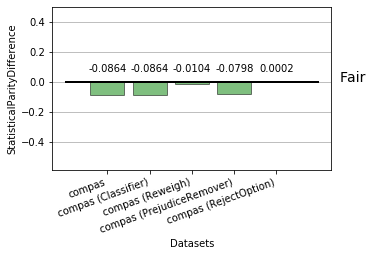

In [217]:
references=['label','prediction','prediction','prediction','prediction']
v.visualize_metric('spd',references=references,rotation=20,color='green')

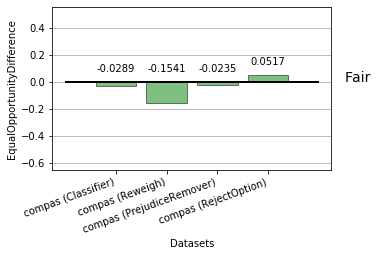

In [219]:
w = vis.Visualization([ds_c_class,ds_c_rw_class,ds_c_pr,ds_c_ro],figsize_Y=3)
w.visualize_metric('eod',rotation=20,color='green')

In [166]:
class simple_model():
    
    def __init__(self,dataset,epochs=1,ntrain=1000,batch_size=128):
        self.dataset     = dataset
        self.epochs      = epochs
        self.num_samples = len(dataset.dataframe)
        self.num_f       = len(self.dataset.train_features)
        self.ntrain      = ntrain
        self.batch_size  = batch_size
        self.process_data()
        
    def process_data(self):
        """ 
        Processes the data from the Dataset object so that it
        is compatible with the training model.
        """
    
        if not self.dataset.train_features:
            raise ValueError("Dataset must contain designated training features")

        self.df = self.dataset.dataframe.copy()

        self.X  = self.df[self.dataset.train_features]
        self.Y  = self.df['Label_binary']

        prot_idx   = self.df[self.df['Label_binary']==1].index.values
        unprot_idx = self.df[self.df['Label_binary']==0].index.values
        prot_row   = np.random.choice(prot_idx,self.ntrain)
        unprot_row = np.random.choice(unprot_idx,self.ntrain)
        rows       = np.concatenate((prot_row, unprot_row))
            
        self.samples = self.df.loc[rows]
        X_val = self.samples[self.dataset.train_features].values.copy()
        Y_val = self.samples['Label_binary'].values.copy()

        LE      = LabelEncoder()
        Y_val   = LE.fit_transform(Y_val)

        scaler = StandardScaler()
        X_val = scaler.fit_transform(X_val)

        is_numeric = self.X.apply(lambda s: pd
                                           .to_numeric(s, errors='coerce')
                                           .notnull().all()
                                 )
        if any(res == False for res in is_numeric):
            raise ValueError("Training features must be numeric")

        self.X_val = np.array(X_val,dtype='float32')
        self.Y_val = np.array(Y_val,dtype='float32')
        
    def fit(self):

        tqdm_callback = tfa.callbacks.TQDMProgressBar()

        def build_model():
            model = Sequential()
            model.add(Dense(120,activation='relu'))
            model.add(Dense(60,activation='relu'))
            model.add(Dense(30,activation='relu'))
            model.add(Dense(1,activation= 'sigmoid'))
            model.compile(optimizer     = 'adam',
                          loss          = 'binary_crossentropy',
                          metrics       = ['accuracy'],
                          run_eagerly   = True)
            return model

        self.model  = build_model()
        history     = self.model.fit(self.X_val, self.Y_val,
                            batch_size  = self.batch_size,
                            callbacks   = [tqdm_callback],
                            epochs      = self.epochs)
        return history
    
    
    def transform(self):

        if not hasattr(self,'model'):
            raise AttributeError("Transform should not be called before fit")

        scalar = StandardScaler()
        X_val       = self.X.values.copy()
        X_val = scalar.fit_transform(X_val)
        predictions = self.model.predict(X_val)

        transformed_dataset = ds.Dataset(
                self.df,
                label_names = self.dataset.label_names,
                protected_attribute_names=self.dataset.protected_attribute_names,
                title = self.dataset.title + ' (Classifier)',
                predictions = predictions,
                categorical_features = self.dataset.cat_features,
                training_features = self.dataset.train_features,
                model = self.model,
                alter_dataframe = False)

        return transformed_dataset

In [228]:
ds_c_class.model